In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
circuits= pd.read_csv("data/circuits.csv")
constructor_result= pd.read_csv("data/constructor_results.csv")
constructor_standing= pd.read_csv("data/constructor_standings.csv")
constructors=pd.read_csv("data/constructors.csv")
driver_standings=pd.read_csv("data/driver_standings.csv")
drivers=pd.read_csv("data/drivers.csv")
lap_times=pd.read_csv("data/lap_times.csv")
pit_stops=pd.read_csv("data/pit_stops.csv")
qualifying=pd.read_csv("data/qualifying.csv")
races=pd.read_csv("data/races.csv")
results=pd.read_csv("data/results.csv")
seasons=pd.read_csv("data/seasons.csv")
sprint_results=pd.read_csv("data/sprint_results.csv")
status=pd.read_csv("data/status.csv")

In [3]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [4]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [5]:
constructor_standing.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [6]:
constructor_result.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [7]:
const_df=pd.merge(constructors,constructor_standing, on = "constructorId")

In [8]:
#const_df.merge(constructor_result, on = "constructorId")

In [9]:
const_df

,constructorId,constructorRef,name,nationality,url,constructorStandingsId,raceId,points,position,positionText,wins
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,18,14.0,1,1,1
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,7,19,24.0,1,1,1
2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,20,28.0,3,3,1
3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,29,21,34.0,3,3,1
4,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,40,22,42.0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...
13046,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,28518,1106,44.0,5,5,0
13047,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,28538,1107,47.0,5,5,0
13048,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,28548,1108,47.0,6,6,0
13049,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,28558,1109,47.0,6,6,0


In [10]:
constructor_points = const_df.groupby('name')['points'].sum()

In [11]:
constructor_points

name
AGS                  14.0
ATS                  65.0
Alfa Romeo         2088.0
AlphaTauri         2884.0
Alpine F1 Team     3761.0
                   ...   
Vanwall             247.0
Virgin                0.0
Williams          32147.5
Wolf                687.0
Zakspeed             30.0
Name: points, Length: 159, dtype: float64

In [12]:
top_constructors=constructor_points.sort_values(ascending=False).head(10)

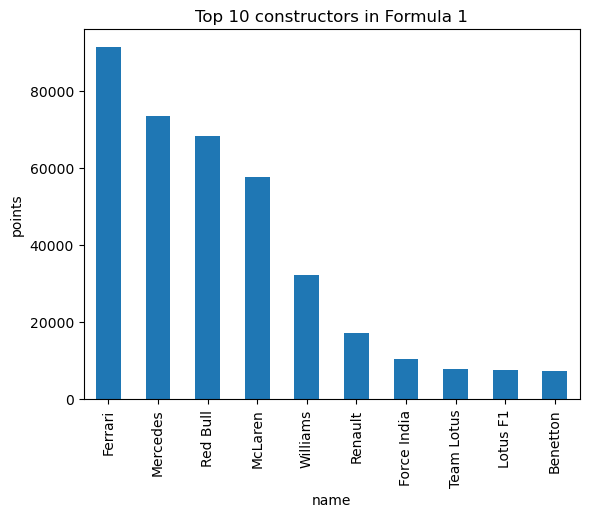

In [13]:
plt.figure()
top_constructors.plot(kind="bar")
plt.xlabel('name')
plt.ylabel("points")
plt.title('Top 10 constructors in Formula 1')
plt.show()

In [14]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [15]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [16]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [20]:
driver_df=pd.merge (drivers, driver_standings, on="driverId")

In [21]:
top_drivers_point=driver_df.groupby('surname')['points'].sum()

In [22]:
top_drivers_points=top_drivers_point.sort_values(ascending=False).head(10)

In [23]:
top_drivers_points

surname
Hamilton      46550.5
Vettel        32026.0
Verstappen    22604.5
Alonso        21692.0
Bottas        19458.0
Räikkönen     19069.0
Rosberg       18283.5
Schumacher    17768.0
Pérez         13756.0
Ricciardo     13626.0
Name: points, dtype: float64

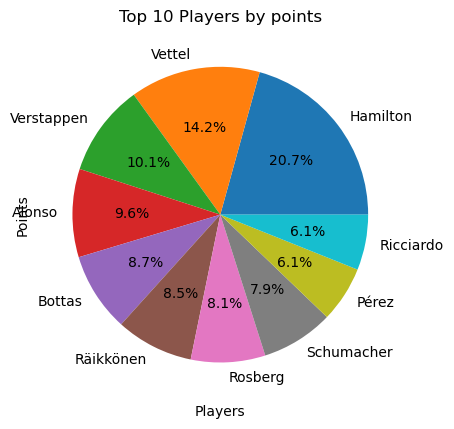

In [31]:
plt.figure()
top_drivers_points.plot(kind="pie",autopct="%1.1f%%")
plt.xlabel("Players")
plt.ylabel("Points")
plt.title("Top 10 Players by points")
plt.show()

In [39]:
#top_drivers_point['age'] = current_year - drivers['dob'].apply(lambda x: int(x.split('-')[0]))


In [46]:
current_year = 2023  
drivers['age'] = current_year - drivers['dob'].apply(lambda x: int(x.split('-')[0]))
age_groups = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']
drivers['age_group'] = pd.cut(drivers['age'], bins=[18, 25, 30, 35, 40, 45, 50, float('inf')], labels=age_groups)
age_group_counts = drivers['age_group'].value_counts()


In [48]:
age_group_counts

age_group
51+      746
41-45     24
46-50     24
36-40     20
31-35     19
26-30     15
18-25      9
Name: count, dtype: int64

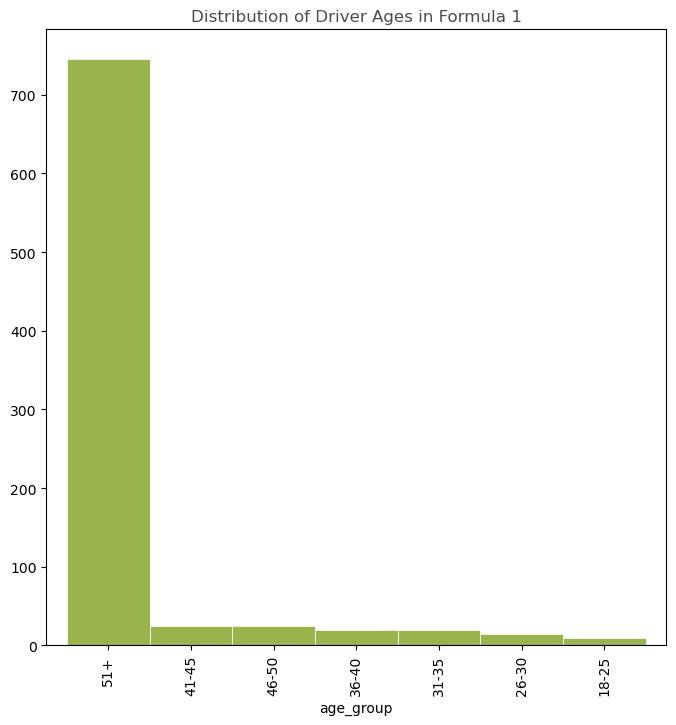

In [68]:
plt.figure(figsize=(8, 8))
age_group_counts.plot(kind="bar", width=1, edgecolor="white", linewidth=0.5, facecolor=(.60, .70, .30))
plt.title('Distribution of Driver Ages in Formula 1', color='0.3')
plt.show()

In [69]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [83]:
race_results = pd.merge(races, results, on='raceId')

In [84]:
finished_races = race_results[race_results['statusId'] == 1]
finished_races

,raceId,year,round,circuitId,name,date,time_x,url,fp1_date,fp1_time,...,positionOrder,points,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,1,10.0,58,1:34:15.784,5655784,17,3,1:28.020,216.891,1
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,2,8.0,58,+0.807,5656591,43,14,1:29.066,214.344,1
2,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,3,6.0,58,+1.604,5657388,50,10,1:28.916,214.706,1
3,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,4,5.0,58,+4.435,5660219,53,6,1:28.416,215.920,1
4,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,...,5,4.0,58,+4.879,5660663,53,9,1:28.712,215.199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26073,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,https://en.wikipedia.org/wiki/2023_Belgian_Gra...,2023-07-28,11:30:00,...,14,0.0,44,+1:36.184,5046634,35,3,1:49.841,229.553,1
26074,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,https://en.wikipedia.org/wiki/2023_Belgian_Gra...,2023-07-28,11:30:00,...,15,0.0,44,+1:41.754,5052204,27,14,1:50.993,227.171,1
26075,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,https://en.wikipedia.org/wiki/2023_Belgian_Gra...,2023-07-28,11:30:00,...,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,https://en.wikipedia.org/wiki/2023_Belgian_Gra...,2023-07-28,11:30:00,...,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1


In [94]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [96]:
pitstops = pd.merge(pit_stops, races, on='raceId')
pitstops_count = pitstops.groupby('circuitId')['raceId'].count()
pitstops_count = pd.merge(pitstops_count, circuits[['circuitId', 'name']], left_index=True, right_on='circuitId')
pitstops_count = pitstops_count.sort_values(by='raceId', ascending=False)

In [117]:
top_pits=pitstops_count.head(10)
top_pits

,raceId,circuitId,name
2,643,3,Bahrain International Circuit
3,627,4,Circuit de Barcelona-Catalunya
10,627,11,Hungaroring
17,599,18,Autódromo José Carlos Pace
8,514,9,Silverstone Circuit
14,499,15,Marina Bay Street Circuit
16,468,17,Shanghai International Circuit
12,461,13,Circuit de Spa-Francorchamps
21,439,22,Suzuka Circuit
69,419,70,Red Bull Ring


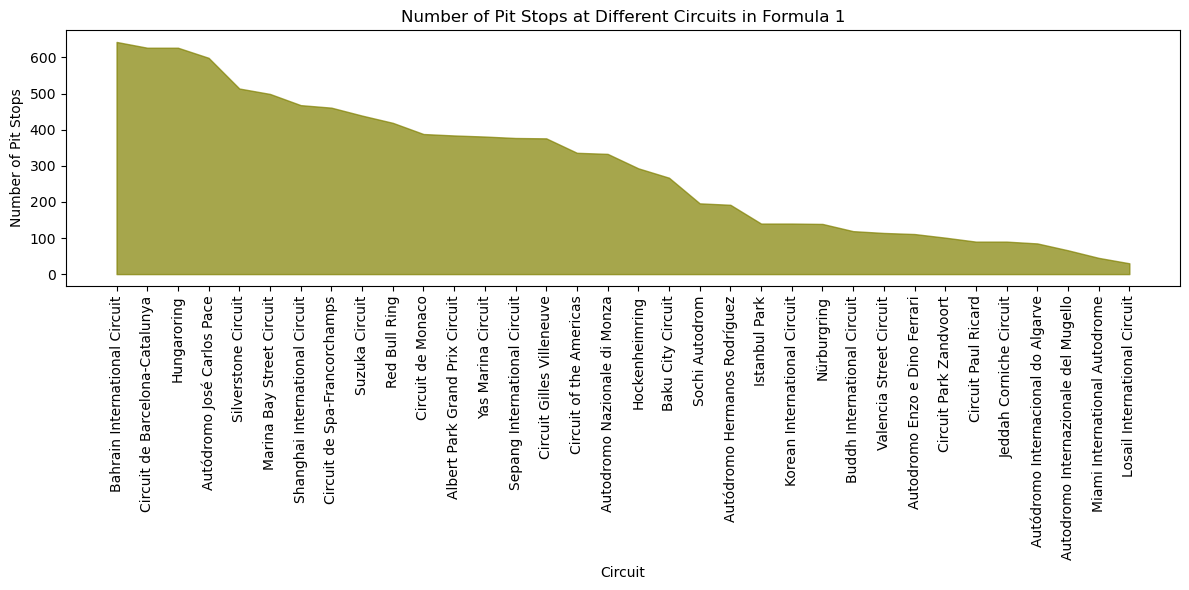

In [122]:
plt.figure(figsize=(12, 6))
plt.fill_between(pitstops_count['name'], pitstops_count['raceId'], color='olive', alpha=0.7)
plt.xlabel('Circuit')
plt.ylabel('Number of Pit Stops')
plt.title('Number of Pit Stops at Different Circuits in Formula 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [124]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 2.2 MB/s eta 0:00:00a 0:00:01


In [126]:

import folium
coordinates=[]
for lat,lng in zip(circuits['lat'],circuits['lng']):
    coordinates.append([lat,lng])
maps = folium.Map(zoom_start=150,tiles='Stamen Watercolor')  #map_types (Stamen Terrain, Stamen Toner, Mapbox Bright, cartodbpositron)
for i,j in zip(coordinates,circuits.name):
    marker = folium.Marker(
        location=i,
        icon=folium.Icon(icon="car",color='cadetblue',prefix='fa'),
        popup="<strong>{0}</strong>".format(j))  #strong is used to bold the font (optional)
    marker.add_to(maps)
maps